[![CraigDoesData][logo]][link]

[logo]: ./img/logo.png
[link]: https://www.craigdoesdata.de/


# Badestellen - Where to swim in Berlin!
Data Analysis project looking at public bathing spots in Berlin.

See the [article](https://towardsdatascience.com/where-to-swim-in-berlin-4ed862633cd3) that accompanies this analysis on [Towards Data Science](https://towardsdatascience.com/where-to-swim-in-berlin-4ed862633cd3).

#### Project status - Complete

## Introduction
The purpose of this project was to take publicly available data regarding bathing spots in the city of Berlin, Germany, and use Exploratory Data Analysis to identify which area is most attractive if one's only criterion regarding where to live is the availability of bathing spots.

The intention was to perform some basic EDA which could then be documented in the accompanying [article](https://towardsdatascience.com/where-to-swim-in-berlin-4ed862633cd3) to give beginners in the Python Data Science universe an introduction to some of the most useful features of [pandas](https://pandas.pydata.org/) and [Matplotlib](https://matplotlib.org/).

The [article](https://towardsdatascience.com/where-to-swim-in-berlin-4ed862633cd3) also contains the discussion of the issues surrounding the data, along with methodological and philosophical issues relating to the project, and language issues that arise from using Data Sources which are primarily in German while writing a Notebook and an article in English.

### Methods used
* EDA
* Data visualisation

### Technologies used
* [Jupyter Notebook](https://jupyter.org/)
* [pandas](https://pandas.pydata.org/)
* [NumPy](https://numpy.org/)
* [Matplotlib](https://matplotlib.org/)

### Data sources
Badestellen data from: [Berlin Open Data](https://daten.berlin.de/datensaetze/liste-der-badestellen) - stored [here](https://github.com/thecraigd/Badestellen/blob/master/data/badestellen.csv) as badestellen.csv

Badestelle map from [berlin.de](https://www.berlin.de/lageso/gesundheit/gesundheitsschutz/badegewaesser/karte/)

Einwohner / Inhabitant data from: [Berlin Open Data](https://daten.berlin.de/datensaetze/einwohnerinnen-und-einwohner-berlin-lor-planungsr%C3%A4umen-am-31122018) - stored [here](https://github.com/thecraigd/Badestellen/blob/master/data/EWR201812E_Matrix.csv) as EWR201812E_Matrix.csv

Bezirk / District number data from: [Amt für Statistik Berlin-Brandenburg](https://www.statistik-berlin-brandenburg.de/regionalstatistiken/r-gesamt_neu.asp?Ptyp=410&Sageb=33000&creg=BBB&anzwer=8)

Bezirk area data from: [Amt für Statistik Berlin-Brandenburg / Wikipedia](https://de.wikipedia.org/wiki/Berlin#Stadtgliederung)



---------------------


## Table of Contents

#### 1. Import and Cleaning
* 1.1 Library and Data Import
* 1.2 Data Inspection

#### 2. Exploratory Data Analysis
* 2.1 Sort the DataFrame Alphabetically by District
* 2.2 Visual Exploratory Data Analysis
* 2.3 Identify Districts with Bathing Spots
* 2.4 Create New DataFrame using [Count](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.count.html)
* 2.5 Plot Bar Chart, Confirm Equivalence
* 2.6 Sort Chart by Number of Bathing Spots

#### 3. Control for Population
* 3.1 Importing the Population Data
* 3.2 Exploratory Data Analysis
* 3.3 Dropping Unnecessary Columns
* 3.4 Grouping the Data by District
* 3.5 Identifying Districts and Updating Column Names
* 3.6 Merge DataFrames
* 3.7 Calculate Ratio of Bathing Spots per Inhabitant
* 3.8 Create a Bar Chart

#### 4. Control for Area
* 4.1 Add Area to DataFrame
* 4.2 Merge DataFrames
* 4.3 Calculate Ratio of Bathing Spots per Square Kilometre
* 4.4 Create a Bar Chart

#### 5. Conclusion
* 5.1 Conclusion


--------------------------

### 1. Import and Cleaning

##### 1.1 - Library and Data Import

The first step is to import our libraries ([pandas](https://pandas.pydata.org/), [NumPy](https://numpy.org/) and [matplotlib.pyplot](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.html), and use [pd.read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) to read the CSV file containing our Badestellen data into a [pandas](https://pandas.pydata.org/) [DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html). 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

bad = pd.read_csv('./data/badestellen.csv', sep=';')

##### 1.2 - Data Inspection
Let's take a look at the [head](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html) of the DataFrame to see what we're dealing with.

In [2]:
display(bad.head())

,id,prognoselink,farbe,badestellelink,badname,bezirk,dat,cb,eco,ente,...,profillink,pdflink,rss_name,bsl,algen,wasserqualitaet,farb_id,wasserqualitaet_lageso,wasserqualitaet_predict,dat_predict
0,3,NaN,gruen.jpg,"""Alter Hof(Link zur Badestelle Alter Hof)"":/la...",Alter Hof,Steglitz-Zehlendorf,2019-09-03,360,<15,<15,...,"""Unterhavel - Alter Hof(Link zum Badegewässerp...","""Alle Probeentnamen der aktuellen Saison für d...",Alter Hof / Unterhavel,B334,NaN,1,1,1,NaN,NaN
1,6,NaN,gruen.jpg,"""Bammelecke(Link zur Badestelle Bammelecke)"":/...",Bammelecke,Treptow-Köpenick,2019-09-09,<300,<15,<15,...,"""Dahme - Bammelecke(Link zum Badegewässerprofi...","""Alle Probeentnamen der aktuellen Saison für d...",Bammelecke,B225,NaN,1,1,1,NaN,NaN
2,9,NaN,gruen.jpg,"""Breitehorn(Link zur Badestelle Breitehorn)"":/...",Breitehorn,Spandau,2019-09-16,360,423,<15,...,"""Unterhavel - Breitehorn(Link zum Badegewässer...","""Alle Probeentnamen der aktuellen Saison für d...",Breitehorn / Unterhavel,B332,NaN,1,1,1,NaN,NaN
3,12,NaN,gruen.jpg,"""Bürgerablage(Link zur Badestelle Bürgerablage...",Bürgerablage,Spandau,2019-09-04,360,30,<15,...,"""Oberhavel - Bürgerablage(Link zum Badegewässe...","""Alle Probeentnamen der aktuellen Saison für d...",Bürgerablage / Oberhavel,B304,NaN,1,1,1,NaN,NaN
4,15,NaN,gruen.jpg,"""Dämeritzsee(Link zur Badestelle Dämeritzsee)""...",Dämeritzsee,Treptow-Köpenick,2019-09-09,<300,<15,<15,...,"""Großer Müggelsee - Dämeritzsee(Link zum Badeg...","""Alle Probeentnamen der aktuellen Saison für d...",Dämeritzsee,B105,NaN,1,1,1,NaN,NaN


How much data do we have? Let's use [shape](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shape.html) to find out.

In [3]:
# How many rows and columns are we dealing with?
bad.shape

(39, 23)

------------------------

### 2. Exploratory Data Analysis

##### 2.1 - Sort the DataFrame Alphabetically by District
This step is simply to bring some order to the DataFrame.

In [4]:
bad.sort_values(by='bezirk', inplace=True)
display(bad)

,id,prognoselink,farbe,badestellelink,badname,bezirk,dat,cb,eco,ente,...,profillink,pdflink,rss_name,bsl,algen,wasserqualitaet,farb_id,wasserqualitaet_lageso,wasserqualitaet_predict,dat_predict
35,108,NaN,gruen.jpg,"""Teufelssee(Link zur Badestelle Teufelsseee)"":...",Teufelssee,Charlottenburg-Wilmersdorf,2019-09-06,<300,<15,<15,...,"""Teufelssee - Teufelssee(Link zum Badegewässer...","""Alle Probeentnamen der aktuellen Saison für d...",Teufelssee,B936,NaN,1,1,1,NaN,NaN
16,51,NaN,gruen.jpg,"""Freibad Jungfernheide(Link zur Badestelle Fre...","Jungfernheide, Freibad",Charlottenburg-Wilmersdorf,2019-09-05,910,77,15,...,"""Jungfernheideteich - Freibad Jungfernheide(Li...","""Alle Probeentnamen der aktuellen Saison für d...",Freibad Jungfernheide,B922,NaN,1,1,1,NaN,NaN
14,45,NaN,gruen.jpg,"""Halensee(Link zur Badestelle Halensee)"":/lage...",Halensee,Charlottenburg-Wilmersdorf,2019-08-22,<300,<15,<15,...,"""Halensee - Halensee(Link zum Badegewässerprof...","""Alle Probeentnamen der aktuellen Saison für d...",Halensee,B930,NaN,1,1,1,NaN,NaN
13,42,NaN,gruen_prog.jpg,"""Grunewaldturm(Link zur Badestelle Grunewaldtu...",Grunewaldturm,Charlottenburg-Wilmersdorf,2019-09-16,360,<15,<15,...,"""Unterhavel - Grunewaldturm(Link zum Badegewäs...","""Alle Probeentnamen der aktuellen Saison für d...",Grunewaldturm / Unterhavel,B330,NaN,11,1,1,ausgezeichnet,2019-10-27
23,72,NaN,gruen.jpg,"""Strandbad Orankesee(Link zur Badestelle Orank...","Orankesee, Strandbad",Lichtenberg,2019-09-05,<300,<15,15,...,"""Orankesee - Strandbad Orankesee(Link zum Bade...","""Alle Probeentnamen der aktuellen Saison für d...",Strandbad Orankesee,B911,NaN,1,1,1,NaN,NaN
24,75,NaN,gruen.jpg,"""Freibad Plötzensee(Link zur Badestelle Freiba...","Plötzensee, Freibad",Mitte,2019-09-05,<300,<15,127,...,"""Plötzensee - Freibad Plötzensee(Link zum Bade...","""Alle Probeentnamen der aktuellen Saison für d...",Freibad Plötzensee,B915,NaN,1,1,1,NaN,NaN
37,114,NaN,gruen.jpg,"""Seebadeanstalt Weißensee(Link zur Badestelle ...","Weißensee, Seebadeanstalt",Pankow,2019-09-05,<300,15,<15,...,"""Weißer See - Seebadeanstalt Weißensee(Link zu...","""Alle Probeentnamen der aktuellen Saison für d...",Seebadeanstalt Weißensee,B910,NaN,1,1,1,NaN,NaN
21,66,NaN,gruen.jpg,"""Freibad Lübars Ziegeleisee(Link zur Badestell...","Lübars, Freibad (Ziegeleisee)",Reinickendorf,2019-09-05,<300,<15,<15,...,"""Ziegeleisee - Freibad Lübars Ziegeleisee (Lin...","""Alle Probeentnamen der aktuellen Saison für d...",Freibad Lübars (Ziegeleisee),B926,NaN,1,1,1,NaN,NaN
26,81,NaN,gruen.jpg,"""Sandhauser Straße(Link zur Badestelle Sandhau...",Sandhauser Straße,Reinickendorf,2019-09-04,<300,<15,15,...,"""Oberhavel - Sandhauser Straße(Link zum Badege...","""Alle Probeentnamen der aktuellen Saison für d...",Sandhauser Straße / Oberhavel,B302,NaN,1,1,1,NaN,NaN
15,48,NaN,gruen.jpg,"""Freibad Heiligensee(Link zur Badestelle Freib...","Heiligensee, Freibad",Reinickendorf,2019-09-05,<300,<15,<15,...,"""Heiligensee - Freibad Heiligensee(Link zum Ba...","""Alle Probeentnamen der aktuellen Saison für d...",Freibad Heiligensee,B925,NaN,1,1,1,NaN,NaN


##### 2.2 - Visual Exploratory Data Analysis

Let's plot a histogram showing the absolute distribution of official bathing spots by district of the city.

Technically a histogram should not have any gaps between the bars. However in this case the histogram is going to be showing the number of bathing spots per district, so making some adjustments to make it appear more like a bar chart is acceptable. It's always rewarding to exploit the near-unlimited flexibility of Maplotlib to tweak things!

The tweaks here include using rwidth=0.8 (to create gaps between bars)), bins=np.arange(9)-0.5 (to centre the bars over the ticks on the x-axis), plt.xticks(rotation=90) (to present the district names vertically) and plt.style.use('seaborn') (to use the seaborn style options for aesthetic reasons - this use of [plt.style.use](https://matplotlib.org/3.1.0/gallery/style_sheets/style_sheets_reference.html) will remain in force for the remainder of our visualisations)

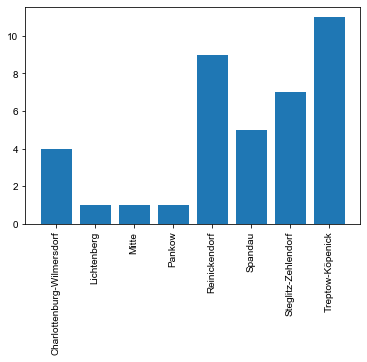

In [5]:
plt.hist(bad['bezirk'], rwidth=0.8, bins=np.arange(9)-0.5)

plt.xticks(rotation=90)
plt.style.use('seaborn')

plt.show()

##### 2.3 - Identify Districts with Bathing Spots

This next part is not strictly necessary for this analysis, but would be useful for larger datasets. It's always good to keep scalability in mind when deigning our code. 

Not all of Berlin's 12 districts are represented in our dataset, because some districts (such as Neukölln) don't contain any official bathing spots. Here we can create a list of the districts which ARE included in our dataset, which could prove useful later in our analysis.

In [6]:
bezirke_mit_badestellen = list(bad['bezirk'].unique())

display(bezirke_mit_badestellen)

['Charlottenburg-Wilmersdorf',
 'Lichtenberg',
 'Mitte',
 'Pankow',
 'Reinickendorf',
 'Spandau',
 'Steglitz-Zehlendorf',
 'Treptow-Köpenick']

##### 2.4 - Create New DataFrame using [Count](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.count.html)

Using a histogram to see the distribution of bathing spots by district has given us effectively the information we are looking for (how many bathing spots each district has). The next step is to create a new DataFrame so that it contains that information explicitly.

In [7]:
stellen_pro_bezirk = pd.DataFrame({'Number_of_Badestellen': bad['bezirk'].groupby(bad['bezirk']).count()}, columns=['Number_of_Badestellen'])

display(stellen_pro_bezirk)

,Number_of_Badestellen
bezirk,
Charlottenburg-Wilmersdorf,4
Lichtenberg,1
Mitte,1
Pankow,1
Reinickendorf,9
Spandau,5
Steglitz-Zehlendorf,7
Treptow-Köpenick,11


There is an in-depth breakdown of the code used above in the [associated article](https://towardsdatascience.com/where-to-swim-in-berlin-4ed862633cd3), if that would be helpful at this stage.

##### 2.5 - Plot Bar Chart, Confirm Equivalence

Let's plot a bar chart to confirm that the transformed DataFrame gives us the same output as the histogram on our first DataFrame.

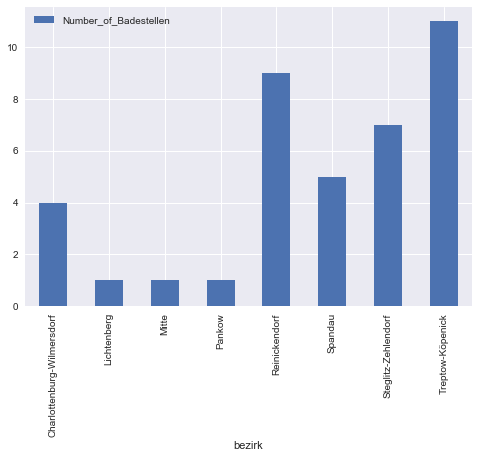

In [8]:
stellen_pro_bezirk.plot(kind='bar')

##### 2.6 - Sort Chart by Number of Bathing Spots

The choice of alphabetical arrangement here was arbitrary, it makes more sense now to arrange the data in order of the measure we are interested in - Number_of_Badestellen. Pandas makes this very easy for us.

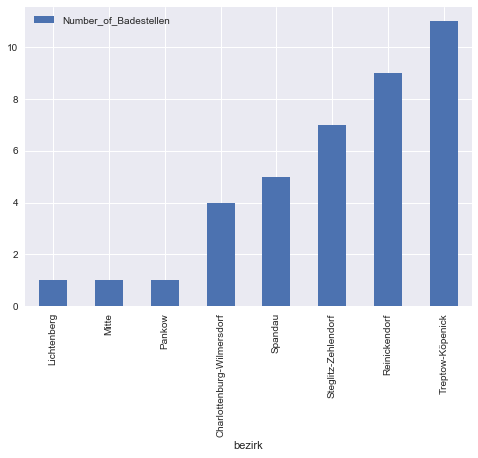

In [9]:
stellen_pro_bezirk.sort_values(by='Number_of_Badestellen', inplace=True)
stellen_pro_bezirk.plot(kind='bar')

And now we can clearly see which districts have the most bathing spots.

----------------------------

### 3. Controlling for Population and Area


The districts of Berlin vary widely by population and by area. It seems wise to take this into consideration when performing our analysis. Perhaps the district with the largest number of bathing spots is also the district with the largest number f people living there?

It would be nice to know how many bathing spots there are per person then, so we can take that into consideration. Our initial dataset does not contain population information. This means we will have to find it elsewhere. Thankfuly this information is [readily available](https://daten.berlin.de/datensaetze/einwohnerinnen-und-einwohner-berlin-lor-planungsr%C3%A4umen-am-31122018).

##### 3.1 - Importing the Population Data

In [10]:
einwohner = pd.read_csv('./data/EWR201812E_Matrix.csv', sep=';')
display(einwohner.head(10))

,ZEIT,RAUMID,BEZ,PGR,BZR,PLR,STADTRAUM,E_E,E_EM,E_EW,...,E_E95_110,E_EU1,E_E1U6,E_E6U15,E_E15U18,E_E18U25,E_E25U55,E_E55U65,E_E65U80,E_E80U110
0,201812,1011101,1,1,11,1,1,3384,1751,1633,...,6,27,151,120,38,322,1616,383,542,185
1,201812,1011102,1,1,11,2,1,196,127,69,...,0,0,3,3,3,12,115,38,22,0
2,201812,1011103,1,1,11,3,1,5038,2698,2340,...,21,48,195,325,109,412,2281,742,694,232
3,201812,1011104,1,1,11,4,1,4759,2626,2133,...,7,38,223,394,143,578,2563,457,281,82
4,201812,1011105,1,1,11,5,1,1421,771,650,...,0,16,67,87,15,90,743,180,184,39
5,201812,1011201,1,1,12,1,1,2405,1267,1138,...,0,17,102,149,59,204,1129,364,291,90
6,201812,1011202,1,1,12,2,1,632,346,286,...,0,3,24,27,24,27,337,90,81,19
7,201812,1011203,1,1,12,3,1,1115,594,521,...,0,9,50,53,12,64,619,139,127,42
8,201812,1011204,1,1,12,4,1,8279,4211,4068,...,6,100,378,411,105,496,4198,959,1219,413
9,201812,1011301,1,1,13,1,1,6919,3587,3332,...,3,80,384,403,85,395,4314,607,540,111


##### 3.2 - Exploratory Data Analysis

Let's examine this data a little more closely to get a look at what we're dealing with.

The data from [Berlin Open Data](https://daten.berlin.de/datensaetze/einwohnerinnen-und-einwohner-berlin-lor-planungsr%C3%A4umen-am-31122018) very helpfully comes with an [explanatory guide](./data/Beschreibung_EWR_Datenpool_2018.pdf) (in German, understandably). This provides information about what the rows and columns mean. 

In this case, we have 51 different columns. Each row represents an administrative area in the city of Berlin. There is a lot of useful data here, but for our purposes the columns 'BEZ' (Bezirk (District)) and 'E_E' (Einwohner insgesamt (Total inhabitants)) are the fields of interest.

In [11]:
display(einwohner.shape)

display(einwohner['E_E'].max())
display(einwohner['E_E'].min())
display(einwohner['E_E'].sum())

# So we can see we have 447 rows of data with 51 columns. Each row represents an administrative area in Berlin.
# The maximum value in column 'E_E' (the number of people who live in that area) is 36,487, the minimum is 12 - 
# That's quite a range!

(447, 51)

36487

12

3748148

We can see we have 447 rows of data with 51 columns. The maximum value in column 'E_E' (the number of people who live in that area) is 36,487, the minimum is 12 - that's quite a range!

##### 3.3 - Dropping Unnecessary Columns

As we only want to examine the 'BEZ' and 'E_E' columns, we can create a new DataFrame including only those columns. We can do this using [.iloc](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html).

In [12]:
einwohner_edited = einwohner.iloc[:,[2,7]]

display(einwohner_edited.head())

,BEZ,E_E
0,1,3384
1,1,196
2,1,5038
3,1,4759
4,1,1421


##### 3.4 - Grouping the Data by District

This data is still very granular. We still have 447 rows showing the information at the local level, but we are specifically interested in finding the information at the District or *Bezirk* level. We can use pandas [groupby](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) method to easily do this.

In [13]:
einwohner_sum = einwohner_edited.groupby('BEZ').sum()
display(einwohner_sum)

,E_E
BEZ,
1,383457
2,289120
3,407039
4,341327
5,243080
6,308077
7,351429
8,330786
9,269775


##### 3.5 - Identifying Districts and Updating Column Names

Now we have the population value of each District in Berlin (as of December 2018), but they're listed as numbers. Our stellen_pro_bezirk DataFrame has them listed by name, which is much more comprehensible.

These numbers 1 through 12 are used by the Berlin City Administration to identify each district. There is a [standard mapping](https://www.statistik-berlin-brandenburg.de/regionalstatistiken/r-gesamt_neu.asp?Ptyp=410&Sageb=33000&creg=BBB&anzwer=8) that is always used (e.g. 1 always means Mitte, 3 always means Pankow) across all of the city bureaucracy. This information is [available](https://www.statistik-berlin-brandenburg.de/regionalstatistiken/r-gesamt_neu.asp?Ptyp=410&Sageb=33000&creg=BBB&anzwer=8) in multiple places online.

We can easily create a list with these districts in order, and add it to our new DataFrame. At the same time we can rename the columns to make them more meaningful.

In [14]:
bezirke = ['Mitte', 'Friedrichshain-Kreuzberg', 'Pankow', 'Charlottenburg-Wilmersdorf', 'Spandau', 'Steglitz-Zehlendorf', 'Tempelhof-Schöneberg', 'Neukölln', 'Treptow-Köpenick', 'Marzahn-Hellersdorf', 'Lichtenberg', 'Reinickendorf']

einwohner_sum['Bezirk'] = bezirke
einwohner_sum.columns = ['Population', 'Bezirk']
display(einwohner_sum)

,Population,Bezirk
BEZ,,
1,383457,Mitte
2,289120,Friedrichshain-Kreuzberg
3,407039,Pankow
4,341327,Charlottenburg-Wilmersdorf
5,243080,Spandau
6,308077,Steglitz-Zehlendorf
7,351429,Tempelhof-Schöneberg
8,330786,Neukölln
9,269775,Treptow-Köpenick


###### 3.6 - Merge DataFrames

Our next step is to [merge](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html) to join the DataFrames together, matching by district.

In [15]:
pop_and_badestellen = pd.merge(stellen_pro_bezirk, einwohner_sum, left_on='bezirk', right_on='Bezirk')

display(pop_and_badestellen)

,Number_of_Badestellen,Population,Bezirk
0,1,290493,Lichtenberg
1,1,383457,Mitte
2,1,407039,Pankow
3,4,341327,Charlottenburg-Wilmersdorf
4,5,243080,Spandau
5,7,308077,Steglitz-Zehlendorf
6,9,264826,Reinickendorf
7,11,269775,Treptow-Köpenick


##### 3.7 - Calculate Ratio of Bathing Spots per Inhabitant

We can use some very simple maths here to calculate this ratio and add it as a new column to the DataFrame.

In [16]:
pop_and_badestellen['badestellen_pro_einwohner'] = pop_and_badestellen['Number_of_Badestellen'] / pop_and_badestellen['Population']

display(pop_and_badestellen)

,Number_of_Badestellen,Population,Bezirk,badestellen_pro_einwohner
0,1,290493,Lichtenberg,0.000003
1,1,383457,Mitte,0.000003
2,1,407039,Pankow,0.000002
3,4,341327,Charlottenburg-Wilmersdorf,0.000012
4,5,243080,Spandau,0.000021
5,7,308077,Steglitz-Zehlendorf,0.000023
6,9,264826,Reinickendorf,0.000034
7,11,269775,Treptow-Köpenick,0.000041


##### 3.8 - Create a Bar Chart

There we have it. Now we can visualise this information in bar chart form and compare to our prior results.

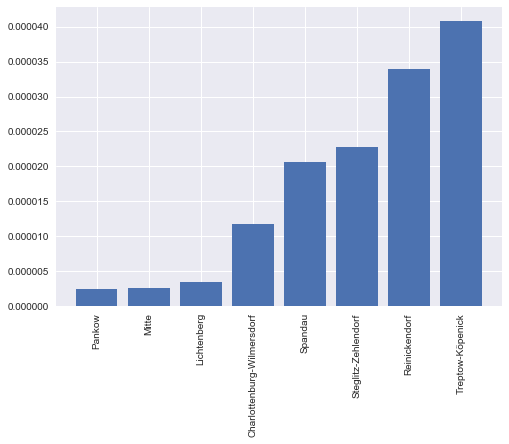

In [17]:
# sorting the DataFrame by the measure of interest
pop_and_badestellen.sort_values(by='badestellen_pro_einwohner', inplace=True)

plt.bar(data=pop_and_badestellen, x='Bezirk', height='badestellen_pro_einwohner')
plt.xticks(rotation=90)

plt.show()

Now we can compare our figures directly.

![Comparison of Results - Population](./img/pop_comparison.png)

We can see that the order of the districts remains unchanged until we get to the three districts which only have one bathing spot each. So Treptow-Köpenick is still in the lead, even when we control by population.

Using a visualisation also lets us easily grasp the relative differences between the districts using both measures, which makes this particularly useful.

### 4. Control by Area

Now let's do the same thing, but this time controlling for area instead of population. Perhaps the least dense areas have more bathing spots? That would be interesting to know.

##### 4.1 Add Area to DataFrame

The area (Fläche, in German) information can be sourced from a number of places - the easiest being [wikipedia](https://de.wikipedia.org/wiki/Berlin).

We will create a list with the areas in order, and add this as a new column to a copy of our einwohner_sum DataFrame from earlier.

In [18]:
area = [3947, 2041, 10306, 6472, 9187, 10256, 5303, 4493, 16842, 6178, 5212, 8931]

einwohner_area = einwohner_sum.copy()
einwohner_area['Fläche'] = area


display(einwohner_area)

,Population,Bezirk,Fläche
BEZ,,,
1,383457,Mitte,3947
2,289120,Friedrichshain-Kreuzberg,2041
3,407039,Pankow,10306
4,341327,Charlottenburg-Wilmersdorf,6472
5,243080,Spandau,9187
6,308077,Steglitz-Zehlendorf,10256
7,351429,Tempelhof-Schöneberg,5303
8,330786,Neukölln,4493
9,269775,Treptow-Köpenick,16842


##### 4.2 - Merge DataFrames

Following exactly the same procedure as before we merge our DataFrames.

In [19]:
area_and_badestellen = pd.merge(stellen_pro_bezirk, einwohner_area, left_on='bezirk', right_on='Bezirk')

display(area_and_badestellen)

,Number_of_Badestellen,Population,Bezirk,Fläche
0,1,290493,Lichtenberg,5212
1,1,383457,Mitte,3947
2,1,407039,Pankow,10306
3,4,341327,Charlottenburg-Wilmersdorf,6472
4,5,243080,Spandau,9187
5,7,308077,Steglitz-Zehlendorf,10256
6,9,264826,Reinickendorf,8931
7,11,269775,Treptow-Köpenick,16842


##### 4.3 - Calculate Ratio of Bathing Spots per Square Kilometre

As before, create a new column with the calculated field.

In [20]:
area_and_badestellen['badestellen_pro_km'] = area_and_badestellen['Number_of_Badestellen'] / area_and_badestellen['Fläche']

display(area_and_badestellen)

,Number_of_Badestellen,Population,Bezirk,Fläche,badestellen_pro_km
0,1,290493,Lichtenberg,5212,0.000192
1,1,383457,Mitte,3947,0.000253
2,1,407039,Pankow,10306,0.000097
3,4,341327,Charlottenburg-Wilmersdorf,6472,0.000618
4,5,243080,Spandau,9187,0.000544
5,7,308077,Steglitz-Zehlendorf,10256,0.000683
6,9,264826,Reinickendorf,8931,0.001008
7,11,269775,Treptow-Köpenick,16842,0.000653


##### 4.4 - Create a Bar Chart

Following the same procedure as before.

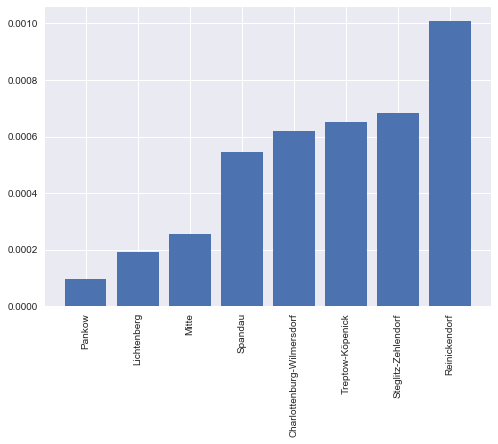

In [21]:
# sorting the DataFrame by the measure of interest
area_and_badestellen.sort_values(by='badestellen_pro_km', inplace=True)

plt.bar(data=area_and_badestellen, x='Bezirk', height='badestellen_pro_km')
plt.xticks(rotation=90)

plt.show()

Now we can compare our figures directly.

![Comparison of Results - Area](./img/area_comparison.png)

When comparing our visualisations now, we can see that in terms of pure geographic concentration of bathing spots, Reinickendorf has taken the top spot from Treptow-Köpenick, which is in third place using this metric.

------------------

### 5. Conclusion

##### 5.1 - Conclusion

What have we learned? Well, mainly that if you’re interested in having the largest choice of bathing spots nearby, along with the fewest other people using them, then Treptow-Köpenick is the place to be! However, Berlin has an excellent public transportation system so just because this district has the highest rate of bathing spots per inhabitant, doesn’t mean you’ll have the whole place to yourself.

If you’re more interested in pure concentration of bathing spots (maybe you want to visit several in one day?), then Reinickendorf is the place for you. In general from this analysis, however, we can safely make a recommendation to a hypothetical person looking for a new place to live, whose most important concern is having lots of bathing spots nearby. They should move to Treptow-Köpenick.